In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# To run sql queries on DataFrame

import pandasql as psql

In [2]:
# Load the claims data

Claims = pd.read_csv(r"D:\datasets\carclaims.csv", header = 0)

# 20% data
#Claims=Claims.groupby('FraudFound',group_keys=False).apply(lambda x: x.sample(frac=0.2)) 


#backup
Claims_bk=Claims.copy()

# Display claims data

Claims

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [3]:
# Load the claims data

Claims = pd.read_csv(r"D:\datasets\carclaims.csv", header = 0)

#backup

Claims_bk=Claims.copy()

# Display claims data

Claims

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [4]:
# Display the dataset information

Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [5]:
# Display the null values in the dataset by count in each variable

Claims.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [6]:
Claims.duplicated().any()

False

In [7]:
#check rows and Columns
print(f"This dataframe contain {Claims.shape[0]} rows")
print(f"This dataframe contain {Claims.shape[1]} columns")

This dataframe contain 15420 rows
This dataframe contain 33 columns


<Axes: >

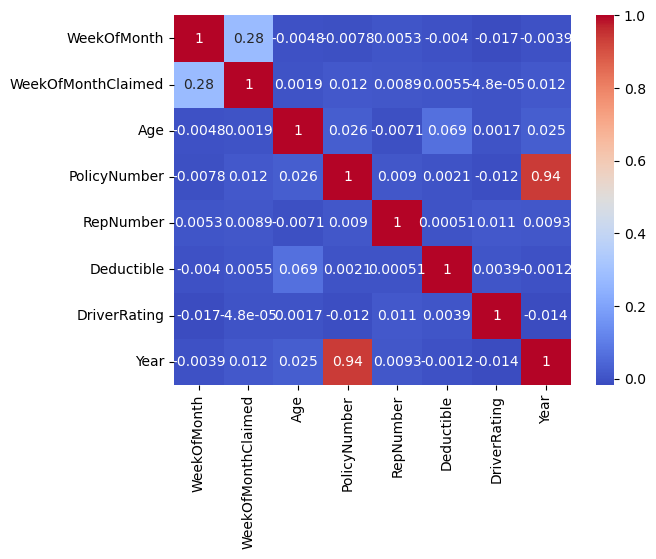

In [8]:
sns.heatmap(Claims.corr(),annot=True,cmap='coolwarm')

In [9]:
Claims

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,"20,000 to 29,000",15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [10]:
cath_features = []
for name in Claims.columns:
    if Claims[name].dtype != "int64":
        cath_features.append(name)


In [11]:
cath_features

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy',
 'FraudFound']

In [12]:
#collected name of Categorical features
categorical_fetures = [x for x in Claims.columns if Claims[x].dtype != "int64"]

In [13]:
categorical_fetures

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy',
 'FraudFound']

In [14]:
Claims.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound                  2
dtype: int

In [15]:
for i in categorical_fetures:
    print (i,':',Claims[i].unique() ,'\n')

Month : ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

DayOfWeek : ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make : ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea : ['Urban' 'Rural'] 

DayOfWeekClaimed : ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed : ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

Sex : ['Female' 'Male'] 

MaritalStatus : ['Single' 'Married' 'Widow' 'Divorced'] 

Fault : ['Policy Holder' 'Third Party'] 

PolicyType : ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils'] 

VehicleCategory : ['Sport' 'Utility' 'Sedan'] 

VehiclePrice : ['more than 69,000' '20,00

In [16]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Claims['Month'] = LE.fit_transform(Claims['Month'])
Claims['DayOfWeek'] = LE.fit_transform(Claims['DayOfWeek'])
Claims['Make'] = LE.fit_transform(Claims['Make'])
Claims['AccidentArea'] = LE.fit_transform(Claims['AccidentArea'])
Claims['DayOfWeekClaimed'] = LE.fit_transform(Claims['DayOfWeekClaimed'])
Claims['MonthClaimed'] = LE.fit_transform(Claims['MonthClaimed'])
Claims['WeekOfMonthClaimed'] = LE.fit_transform(Claims['WeekOfMonthClaimed'])
Claims['Sex'] = LE.fit_transform(Claims['Sex'])
Claims['MaritalStatus'] = LE.fit_transform(Claims['MaritalStatus'])
Claims['Age'] = LE.fit_transform(Claims['Age'])
Claims['PolicyType'] = LE.fit_transform(Claims['PolicyType'])
Claims['VehicleCategory'] = LE.fit_transform(Claims['VehicleCategory'])
Claims['VehiclePrice'] = LE.fit_transform(Claims['VehiclePrice'])
Claims['Days:Policy-Accident'] = LE.fit_transform(Claims['Days:Policy-Accident'])
Claims['Days:Policy-Claim'] = LE.fit_transform(Claims['Days:Policy-Claim'])
Claims['PastNumberOfClaims'] = LE.fit_transform(Claims['PastNumberOfClaims'])
Claims['AgeOfVehicle'] = LE.fit_transform(Claims['AgeOfVehicle'])
Claims['AgeOfPolicyHolder'] = LE.fit_transform(Claims['AgeOfPolicyHolder'])
Claims['PoliceReportFiled'] = LE.fit_transform(Claims['PoliceReportFiled'])
Claims['WitnessPresent'] = LE.fit_transform(Claims['WitnessPresent'])
Claims['AgentType'] = LE.fit_transform(Claims['AgentType'])
Claims['NumberOfSuppliments'] = LE.fit_transform(Claims['NumberOfSuppliments'])
Claims['AddressChange-Claim'] = LE.fit_transform(Claims['AddressChange-Claim'])
Claims['NumberOfCars'] = LE.fit_transform(Claims['NumberOfCars'])
Claims['Fault'] = LE.fit_transform(Claims['Fault'])
Claims['BasePolicy'] = LE.fit_transform(Claims['BasePolicy'])
Claims['FraudFound'] = LE.fit_transform(Claims['FraudFound'])
Claims

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,0,0,2,6,0,5,1,5,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2,0
1,4,3,6,6,1,2,5,3,1,2,19,0,4,1,5,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1,0
2,10,5,0,6,1,5,10,1,1,1,32,0,4,1,5,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1,0
3,6,2,2,17,0,1,6,0,1,1,50,1,2,1,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2,0
4,4,5,1,6,1,6,4,1,0,2,12,1,4,1,5,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,4,1,1,20,0,1,0,0,15416,5,400,4,3,2,1,4,4,0,0,0,3,3,0,1996,1,1
15416,9,5,4,13,1,1,3,0,1,1,15,0,2,1,1,15417,11,400,3,3,2,2,4,4,0,0,0,2,3,2,1996,2,0
15417,9,5,4,17,0,1,3,0,1,2,9,0,1,0,0,15418,4,400,4,3,2,2,3,3,0,0,0,0,3,0,1996,1,1
15418,2,1,1,17,1,5,3,1,0,1,19,1,0,0,0,15419,6,400,4,3,2,3,0,4,0,0,0,2,3,0,1996,0,0


In [17]:
# Identify the Independent and Target variables

IndepVar = []
for col in Claims.columns:
    if col != 'FraudFound':
        IndepVar.append(col)

TargetVar = 'FraudFound'

x = Claims[IndepVar]
y = Claims[TargetVar]

In [18]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

In [19]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

Confusion matrix : 
 [[ 103  182]
 [ 385 3956]]
Outcome values : 
 103 182 385 3956
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.36      0.27       285
           0       0.96      0.91      0.93      4341

    accuracy                           0.88      4626
   macro avg       0.58      0.64      0.60      4626
weighted avg       0.91      0.88      0.89      4626

Accuracy : 87.7 %
Precision : 21.1 %
Recall : 36.1 %
F1 Score : 0.266
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 63.6 %
MCC : 0.213
roc_auc_score: 0.636


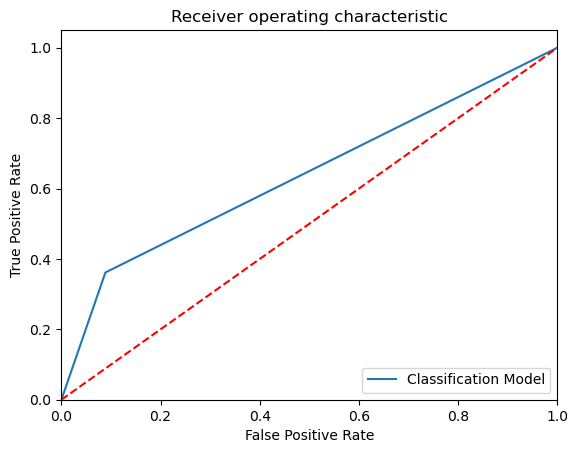

-----------------------------------------------------------------------------------------------------


In [20]:
# To build the 'Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

ModelDT = DecisionTreeClassifier()
#ModelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                 class_weight=None, ccp_alpha=0.0)

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [21]:
Results = pd.DataFrame({'Froad_A':y_test,'Froad_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Claims_bk.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Froad_A,Froad_P
676,Mar,5,Monday,Toyota,Urban,Tuesday,Apr,1,Male,Married,28,Policy Holder,Sedan - All Perils,Sedan,"less than 20,000",677,6,400,2,more than 30,more than 30,1,7 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils,No,0,1
3341,Oct,3,Friday,Toyota,Urban,Tuesday,Oct,3,Male,Married,31,Policy Holder,Sedan - Liability,Sport,"20,000 to 29,000",3342,7,400,3,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Liability,No,0,0
1208,Mar,5,Friday,Mazda,Urban,Thursday,Apr,3,Male,Single,32,Third Party,Sedan - Collision,Sedan,"20,000 to 29,000",1209,15,400,3,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,0,0
3269,May,1,Friday,Chevrolet,Urban,Wednesday,May,3,Male,Married,51,Third Party,Sedan - All Perils,Sedan,"30,000 to 39,000",3270,7,400,3,more than 30,more than 30,1,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,No,0,0
5514,Mar,5,Tuesday,Toyota,Urban,Friday,Apr,1,Male,Married,51,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",5515,5,400,2,more than 30,more than 30,2 to 4,7 years,41 to 50,No,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,0
2025,Mar,2,Friday,Pontiac,Urban,Friday,Mar,2,Male,Married,54,Policy Holder,Sedan - Liability,Sport,"20,000 to 29,000",2026,13,400,4,more than 30,more than 30,more than 4,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Liability,No,0,0
14148,Aug,3,Saturday,Pontiac,Rural,Friday,Sep,2,Male,Single,28,Third Party,Sedan - Collision,Sedan,"30,000 to 39,000",14149,16,400,1,more than 30,more than 30,1,7 years,31 to 35,Yes,Yes,External,none,no change,1 vehicle,1996,Collision,No,0,0
5763,Nov,1,Tuesday,Toyota,Rural,Thursday,Nov,1,Male,Married,50,Policy Holder,Sedan - All Perils,Sedan,"20,000 to 29,000",5764,10,500,2,more than 30,more than 30,1,more than 7,41 to 50,No,No,External,more than 5,2 to 3 years,1 vehicle,1994,All Perils,No,0,0
518,Feb,1,Tuesday,Pontiac,Urban,Tuesday,Feb,1,Male,Married,53,Policy Holder,Sedan - Liability,Sport,"20,000 to 29,000",519,3,400,3,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,No,0,0
5202,Oct,5,Monday,Mazda,Urban,Tuesday,Oct,5,Male,Married,54,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",5203,4,500,2,more than 30,more than 30,1,7 years,41 to 50,No,No,External,1 to 2,2 to 3 years,1 vehicle,1994,Liability,No,0,0


In [22]:
# Load the result dataset

EMResults = pd.read_csv(r"D:\datasets\CSResults.csv", header=0)
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   0  285]
 [   0 4341]]
Outcome values : 
 0 285 0 4341
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       285
           0       0.94      1.00      0.97      4341

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626

Accuracy : 93.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


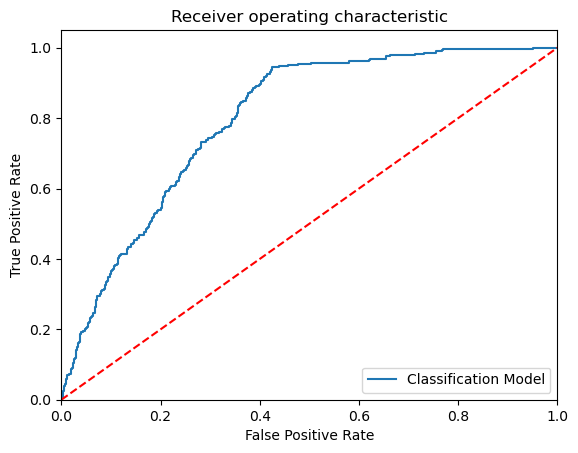

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 107  178]
 [ 386 3955]]
Outcome values : 
 107 178 386 3955
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.38      0.28       285
           0       0.96      0.91      0.93      4341

    accuracy                           0.88      4626
   macro avg       0.59      0.64      0.60      4626
weighted avg       0.91      0.88      0.89      4626

Accuracy : 87.8 %
Precision : 21.7 %
Recall : 37.5 %
F1 Score : 0.275
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 64.3 %
MCC : 0.223
roc_auc_score: 0.643


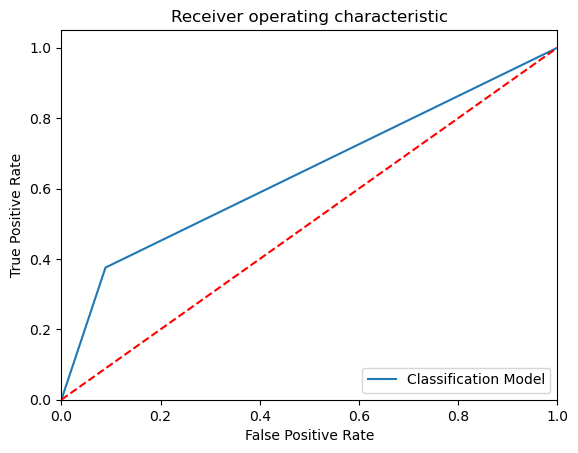

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  29  256]
 [  86 4255]]
Outcome values : 
 29 256 86 4255
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.10      0.14       285
           0       0.94      0.98      0.96      4341

    accuracy                           0.93      4626
   macro avg       0.60      0.54      0.55      4626
weighted avg       0.90      0.93      0.91      4626

Accuracy : 92.6 %
Precision : 25.2 %
Recall : 10.2 %
F1 Score : 0.145
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 54.1 %
MCC : 0.127
roc_auc_score: 0.541


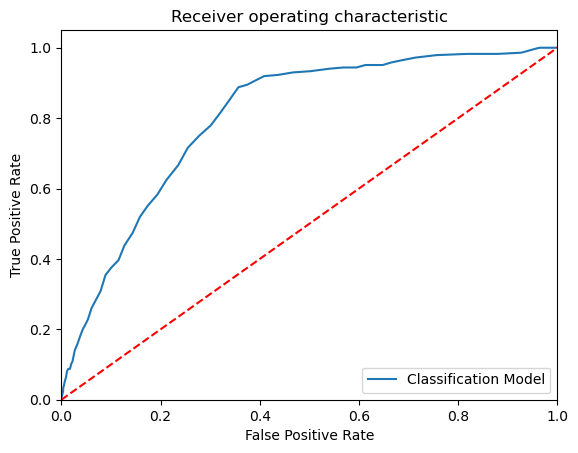

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 265   20]
 [2751 1590]]
Outcome values : 
 265 20 2751 1590
Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.93      0.16       285
           0       0.99      0.37      0.53      4341

    accuracy                           0.40      4626
   macro avg       0.54      0.65      0.35      4626
weighted avg       0.93      0.40      0.51      4626

Accuracy : 40.1 %
Precision : 8.8 %
Recall : 93.0 %
F1 Score : 0.161
Specificity or True Negative Rate : 36.6 %
Balanced Accuracy : 64.8 %
MCC : 0.149
roc_auc_score: 0.648


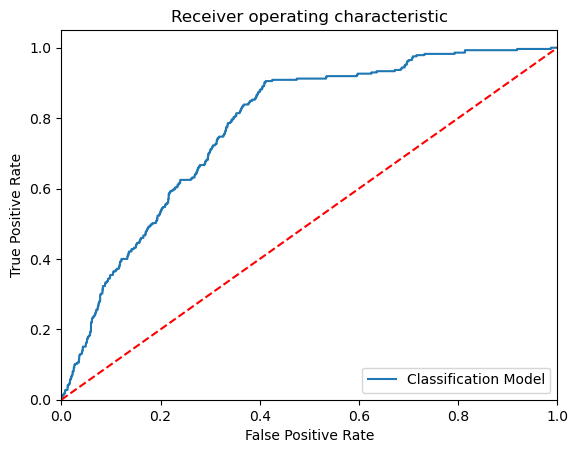

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   0  285]
 [   0 4341]]
Outcome values : 
 0 285 0 4341
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       285
           0       0.94      1.00      0.97      4341

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626

Accuracy : 93.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


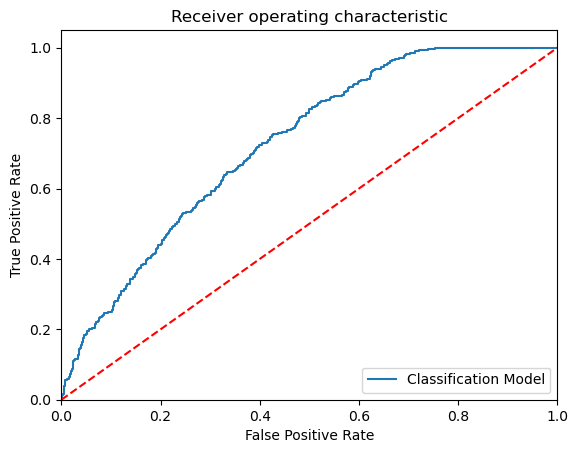

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[   6  279]
 [  23 4318]]
Outcome values : 
 6 279 23 4318
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.02      0.04       285
           0       0.94      0.99      0.97      4341

    accuracy                           0.93      4626
   macro avg       0.57      0.51      0.50      4626
weighted avg       0.89      0.93      0.91      4626

Accuracy : 93.5 %
Precision : 20.7 %
Recall : 2.1 %
F1 Score : 0.038
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 50.8 %
MCC : 0.048
roc_auc_score: 0.508


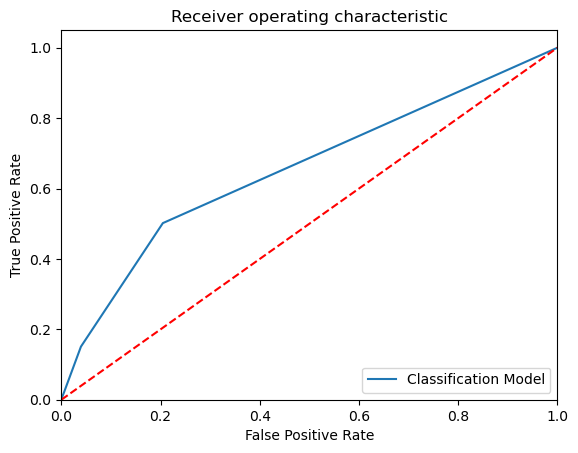

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[   7  278]
 [  22 4319]]
Outcome values : 
 7 278 22 4319
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.02      0.04       285
           0       0.94      0.99      0.97      4341

    accuracy                           0.94      4626
   macro avg       0.59      0.51      0.51      4626
weighted avg       0.90      0.94      0.91      4626

Accuracy : 93.5 %
Precision : 24.1 %
Recall : 2.5 %
F1 Score : 0.045
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 51.0 %
MCC : 0.059
roc_auc_score: 0.51


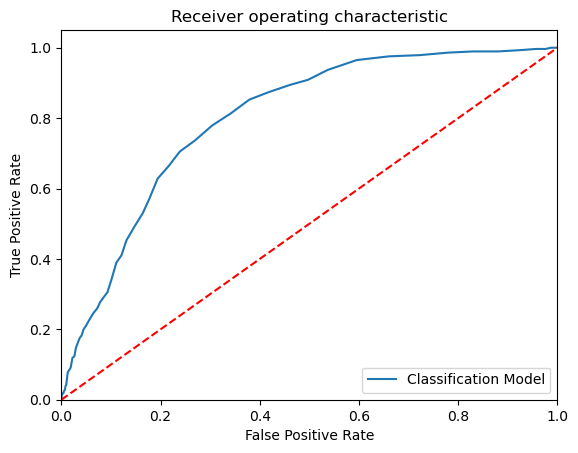

-----------------------------------------------------------------------------------------------------


In [23]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import xgboost as xgb
#import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelGNB, ModelSVM ,ModelKNN , ModelET]

for models in MM:
    
    # Fit the modeltrain data
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test data 
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [24]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,285,0,4341,0.938,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),107,178,386,3955,0.878,0.217,0.375,0.275,0.911,0.223,0.643259,0.643
2,"(DecisionTreeClassifier(max_features='sqrt', r...",29,256,86,4255,0.926,0.252,0.102,0.145,0.980,0.127,0.540972,0.541
3,GaussianNB(),265,20,2751,1590,0.401,0.088,0.930,0.161,0.366,0.149,0.648050,0.648
4,SVC(probability=True),0,285,0,4341,0.938,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
5,KNeighborsClassifier(),6,279,23,4318,0.935,0.207,0.021,0.038,0.995,0.048,0.507877,0.508
6,"(ExtraTreeClassifier(random_state=2121142530),...",7,278,22,4319,0.935,0.241,0.025,0.045,0.995,0.059,0.509747,0.510
